In [90]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import os
import PlaceCellAnalysis as pc
import pickle

os.sys.path.append('../')
import utilities as u
import preprocessing as pp
import behavior as b
import SimilarityMatrixAnalysis as sm
import matplotlib.gridspec as gridspec




%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [435]:
df = pp.load_session_db()
df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
tracks = 'TwoTower_noTimeout|TwoTower_Timeout|Reversal_noTimeout|Reversal|TwoTower_foraging|FreqMorph_Decision|FreqMorph_Timeout'
df = df[df['Track'].str.contains(tracks,regex=True)]


G:\My Drive\VR_Data\TwoTower\behavior.sqlite
G:\My Drive\VR_Data\TwoTower\4222174.0\30_05_2019\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!


In [488]:
mouse = '4222174.1'
df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse

,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,ImagingRegion,DateTime,data file,scanfile,scanmat,s2pfolder
1992,4222174.1,04_06_2019,1,TwoTower_foraging,80,1,CA1,2019-06-04,G:\My Drive\VR_Data\TwoTower\4222174.1\04_06_2...,None,G:\My Drive\2P_Data\TwoTower\4222174.1\04_06_2...,G:\My Drive\2P_Data\TwoTower\4222174.1\04_06_2...
2024,4222174.1,06_06_2019,2,TwoTower_foraging,91,1,CA1,2019-06-06,G:\My Drive\VR_Data\TwoTower\4222174.1\06_06_2...,None,G:\My Drive\2P_Data\TwoTower\4222174.1\06_06_2...,G:\My Drive\2P_Data\TwoTower\4222174.1\06_06_2...
2046,4222174.1,08_06_2019,2,TwoTower_foraging,67,1,CA1,2019-06-08,G:\My Drive\VR_Data\TwoTower\4222174.1\08_06_2...,None,G:\My Drive\2P_Data\TwoTower\4222174.1\08_06_2...,G:\My Drive\2P_Data\TwoTower\4222174.1\08_06_2...
2073,4222174.1,11_06_2019,2,TwoTower_foraging,64,1,CA1,2019-06-11,G:\My Drive\VR_Data\TwoTower\4222174.1\11_06_2...,None,G:\My Drive\2P_Data\TwoTower\4222174.1\11_06_2...,G:\My Drive\2P_Data\TwoTower\4222174.1\11_06_2...
2095,4222174.1,13_06_2019,2,TwoTower_foraging,66,1,CA1,2019-06-13,G:\My Drive\VR_Data\TwoTower\4222174.1\13_06_2...,None,G:\My Drive\2P_Data\TwoTower\4222174.1\13_06_2...,G:\My Drive\2P_Data\TwoTower\4222174.1\13_06_2...
2108,4222174.1,14_06_2019,2,TwoTower_foraging,70,1,CA1,2019-06-14,G:\My Drive\VR_Data\TwoTower\4222174.1\14_06_2...,None,G:\My Drive\2P_Data\TwoTower\4222174.1\14_06_2...,G:\My Drive\2P_Data\TwoTower\4222174.1\14_06_2...
2122,4222174.1,15_06_2019,3,TwoTower_foraging,71,1,CA1,2019-06-15,G:\My Drive\VR_Data\TwoTower\4222174.1\15_06_2...,None,G:\My Drive\2P_Data\TwoTower\4222174.1\15_06_2...,G:\My Drive\2P_Data\TwoTower\4222174.1\15_06_2...


In [489]:
sess = df_mouse.iloc[-1]

In [490]:
VRDat,C, S, A = pp.load_scan_sess(sess)

num aberrant ttls 0.0
30879 (30879,) (30879, 21) 86531


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0


In [491]:
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
S_trial_mat, occ_trial_mat, edges,centers = u.make_pos_bin_trial_matrices(S,VRDat['pos']._values,VRDat['tstart']._values,VRDat['teleport']._values,bin_size=10)
effMorph = trial_info['morphs']+trial_info['bckgndJitter']+trial_info['wallJitter']+trial_info['towerJitter']
effMorph = (effMorph+.25)/1.5

In [492]:
print(centers[-1])

445.0


In [493]:
S_trial_mat[np.isnan(S_trial_mat)]=0
# S_trial_mat = sp.ndimage.filters.gaussian_filter1d(S_trial_mat,1,axis=1)
S_tmat = np.reshape(S_trial_mat[:,:,:],[S_trial_mat.shape[0],-1])
# S_tmat = S_tmat[effMorph<.5,:]
S_tmat = S_tmat/np.linalg.norm(S_tmat,ord=2,axis=-1)[:,np.newaxis]
S_t_rmat = np.matmul(S_tmat,S_tmat.T)

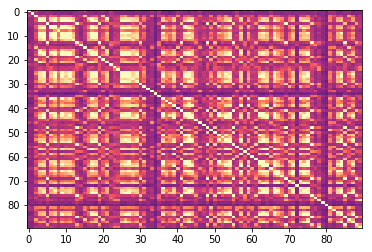

In [494]:
f,ax = plt.subplots()
ax.imshow(S_t_rmat,aspect='auto',cmap='magma',vmax = np.percentile(S_t_rmat,95),vmin=0)

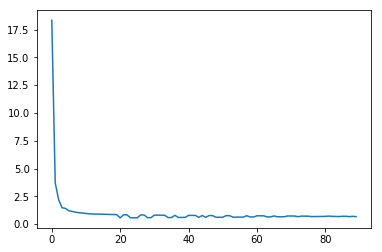

In [495]:
w,V = np.linalg.eig(S_t_rmat)
f,ax = plt.subplots()
ax.plot(w)

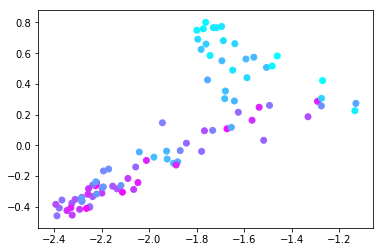

In [496]:
VV = np.matmul(S_t_rmat,V)
f,ax = plt.subplots()
ax.scatter(VV[:,0],VV[:,1],c=effMorph,cmap='cool')

In [497]:
msort = np.argsort(effMorph)

In [498]:
C_msort = sm._sort_simmat(S_t_rmat,msort)

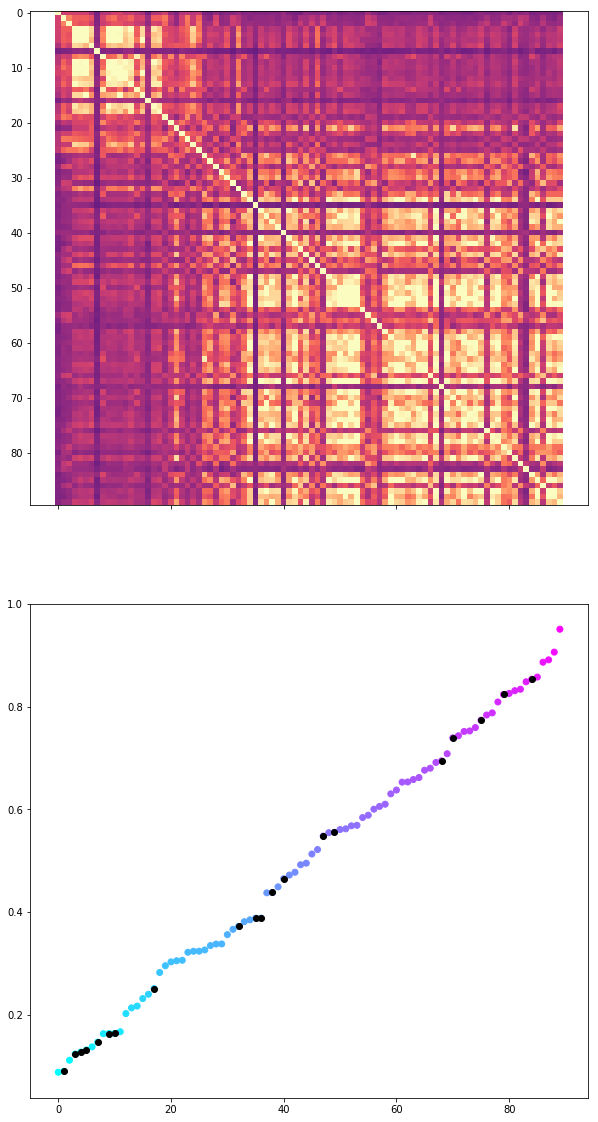

In [499]:
f,ax = plt.subplots(2,1,sharex=True,figsize=[10,20])
ax[0].imshow(C_msort,aspect='auto',cmap='magma',vmax = np.percentile(C_msort,95),vmin=0)
ax[1].scatter(np.arange(effMorph.shape[0]),effMorph[msort],c=effMorph[msort],cmap='cool')
emr = np.copy(effMorph)
emr[trial_info['rewards']>0]=np.nan
ax[1].scatter(np.arange(effMorph.shape[0]),emr[msort],c='black')

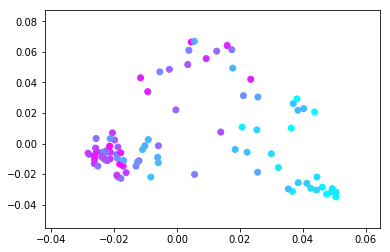

In [500]:
from sklearn.manifold import SpectralEmbedding as se

X = se(affinity='precomputed').fit_transform(S_t_rmat)
f,ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],c=effMorph,cmap='cool')

In [501]:
labels = sm.cluster_simmat(S_t_rmat)
nc = np.unique(labels).shape[0]
clustmean = np.array([effMorph[labels==i].mean() for i in range(nc)])
clusterOrder = np.argsort(clustmean)
llabels = np.zeros(effMorph.shape)

for i,cl in enumerate(clusterOrder.tolist()):
    llabels[labels==cl]=i
#print(clusterOrder)

clustsort = sm._sort_clusters(sm.cluster_simmat(S_t_rmat),effMorph)
C_csort = sm._sort_simmat(S_t_rmat,clustsort)
print(nc)

8.022188086658101
8.183474174537233
5.491958309469831
2.972055329653294
3.174953374016322
3.0303020197197172
2.8242872737380336
2.8160036713385344
8.022188086658101
8.183474174537233
5.491958309469831
3.0035406316830895
3.724777220115362
3.362225279815255
3.0568378611983746
2.8980337162814704
2


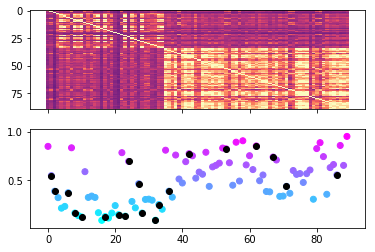

In [502]:
f,ax = plt.subplots(2,1,sharex=True)
ax[0].imshow(C_csort,aspect='auto',cmap='magma',vmax = np.percentile(C_msort,95),vmin=0)
ax[1].scatter(np.arange(effMorph.shape[0]),effMorph[clustsort],c=effMorph[clustsort],cmap='cool')
emr = np.copy(effMorph)
emr[trial_info['rewards']>0]=np.nan
ax[1].scatter(np.arange(effMorph.shape[0]),emr[clustsort],c='black')

In [376]:
# print(labels)
prelabels,postlabels,postreward = llabels[0:-1],llabels[1:],trial_info['rewards'][1:]
transmat = np.zeros([int(np.amax(llabels)+1),int(np.amax(llabels)+1)])

premorph,postmorph = trial_info['morphs'][0:-1],trial_info['morphs'][1:]#effMorph[1:]
for i in range(int(np.amax(llabels)+1)):
    mask = prelabels ==i
    
    transmat[i,:],edges = np.histogram(postlabels[mask],bins=np.arange(0,np.amax(llabels)+2))
    transmat[i,:]/=transmat[i,:].sum()
    print("node ", i)
    print("next node", postlabels[mask])
    
    print("last morph", premorph[mask])
    print("morph", postmorph[mask])
    print("reward", postreward[mask])
    print(transmat[i,:])
    

node  0
next node [0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.]
last morph [0.75 0.25 1.   1.   1.   0.   0.   0.75 0.   0.   0.25 0.25 0.5  0.
 1.   0.   0.25 0.25 0.   0.25 0.   0.5  0.5  0.25 0.   0.   0.5  0.
 0.5  0.5  0.   0.   0.25 0.   0.  ]
morph [0.25 1.   1.   1.   0.   0.5  0.75 0.   0.25 0.5  0.5  0.5  1.   0.75
 1.   0.25 0.25 0.   0.25 0.   0.5  0.25 0.25 0.75 0.25 0.75 1.   0.5
 0.5  0.75 0.5  0.75 0.25 1.   0.  ]
reward [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.]
[0.4 0.6]
node  1
next node [1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0.
 0.]
last morph [0.5  0.5  0.75 1.   0.25 0.5  0.75 0.5  1.   1.   0.75 0.75 1.   0.25
 0.25 1.   0.25 0.25 0.5  0.75 0.25 1.   0.25 0.25 0.5  0.25 0.75 0.75
 0.75 0.5  0.75 1.   0.5  0.5  1.   0.75 1.   0.75 0.75 0

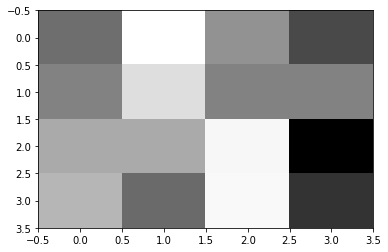

In [687]:
f,ax = plt.subplots()
# transmat = transmat[clusterOrder,:]
# transmat = transmat[:,clusterOrder]
ax.imshow(transmat,aspect='auto',cmap='Greys')

In [688]:
print(llabels)

[2. 0. 0. 0. 0. 3. 3. 0. 0. 2. 0. 3. 0. 3. 1. 2. 2. 3. 0. 3. 1. 0. 0. 2.
 1. 0. 2. 3. 3. 3. 3. 0. 2. 1. 3. 0. 1. 1. 2. 3. 1. 3. 3. 3. 3. 0. 3. 3.
 1. 2. 0. 2. 1. 0. 0. 3. 1. 3. 3. 3. 2. 3. 1. 0. 3. 2. 3. 1. 2. 3. 3. 1.
 3. 1. 1.]


In [689]:
S_clust_mat = np.zeros([int(np.amax(llabels)+1),S_trial_mat.shape[1],S_trial_mat.shape[2]])
for l in np.unique(llabels).tolist():
    S_clust_mat[int(l),:,:] = np.squeeze(np.nanmean(S_trial_mat[llabels==l,:,:],axis=0))

In [670]:
print(S_clust_mat.shape)

(3, 90, 2092)


C:\Users\mplitt\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


KeyboardInterrupt: 

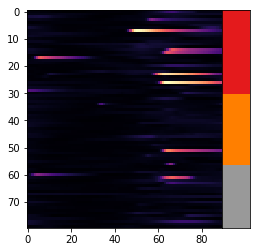

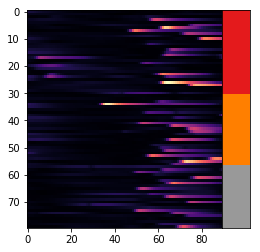

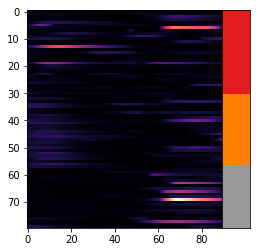

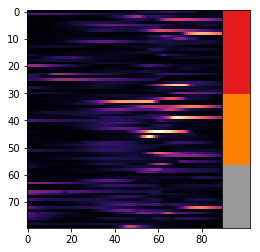

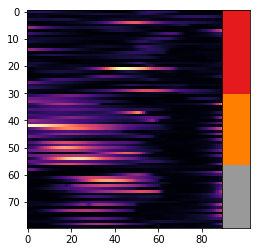

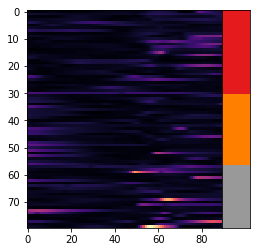

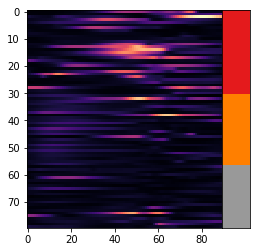

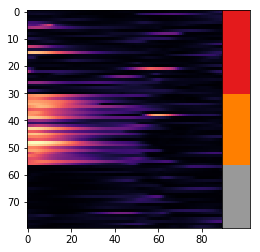

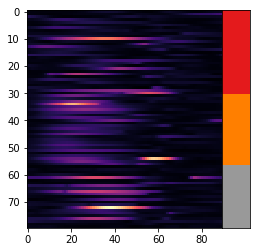

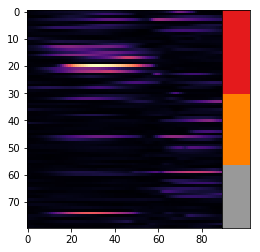

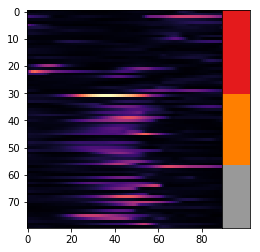

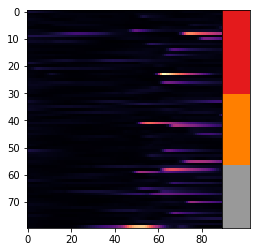

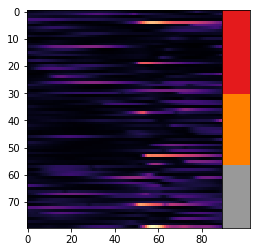

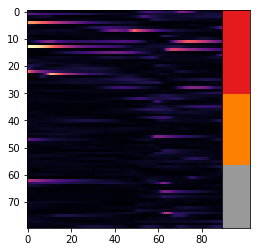

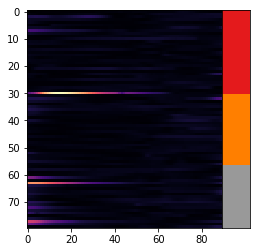

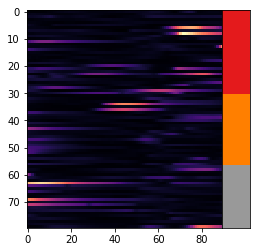

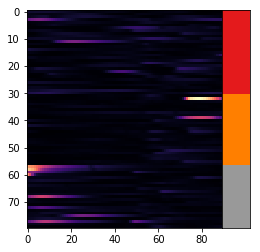

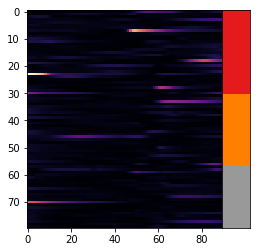

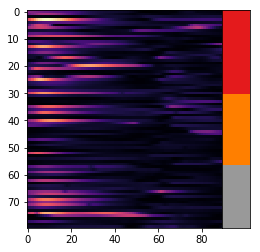

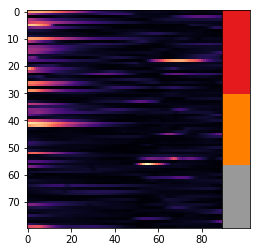

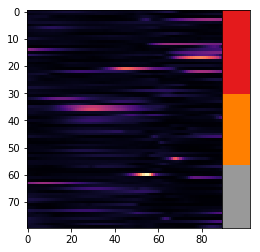

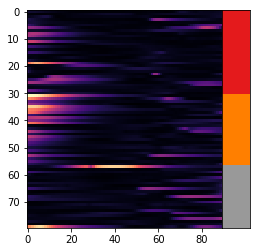

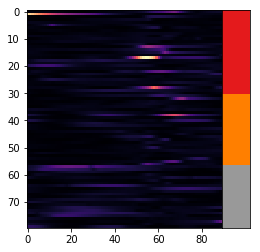

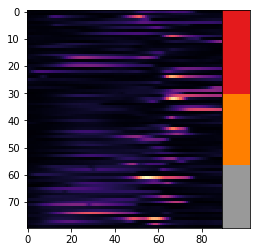

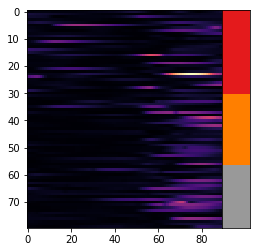

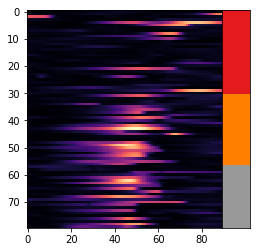

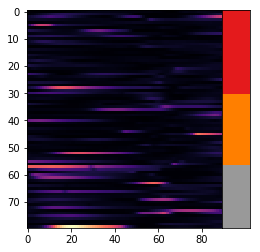

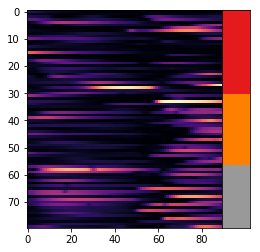

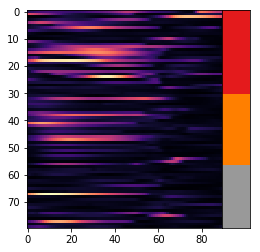

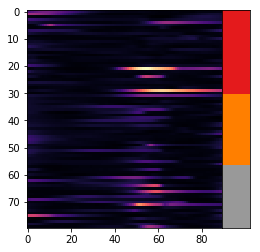

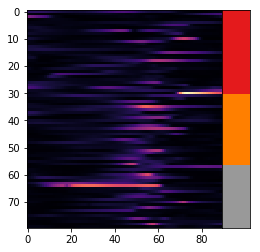

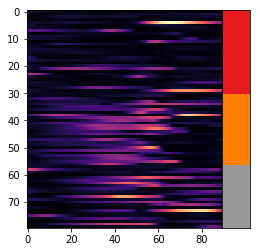

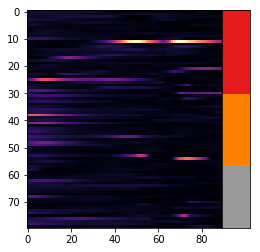

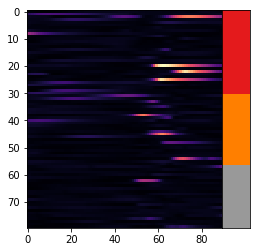

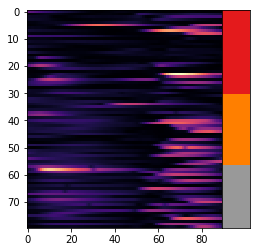

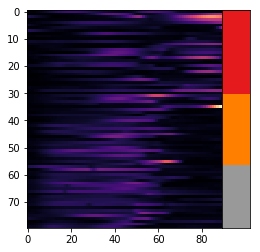

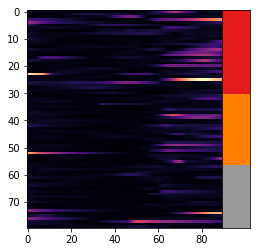

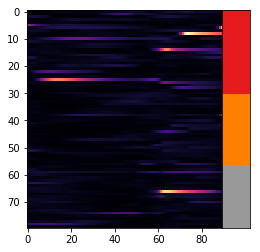

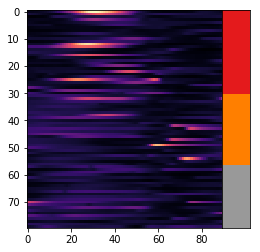

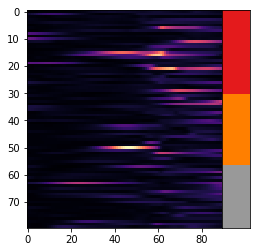

Error in callback <function flush_figures at 0x000001DAF84A8400> (for post_execute):


KeyboardInterrupt: 

In [671]:
S_clust_sort = S_trial_mat[np.argsort(llabels),:,:]
for c in range(0,S_trial_mat.shape[-1],10):
    gs = gridspec.GridSpec(1,8)
    gs.update(wspace=.0)
    f = plt.figure(figsize=[4,4])
    ax = f.add_subplot(gs[:,:-1])
#     f,ax = plt.subplots(1,2,sharey=True)
    ax.imshow(S_clust_sort[:,:,c]/np.nanmean(S_clust_sort[:,:,c].ravel()),cmap='magma',aspect='auto')
    ax = f.add_subplot(gs[:,-1])
    llabels_p = llabels[:,np.newaxis]*np.ones([1,2])

    ax.imshow(llabels_p[np.argsort(llabels),:],aspect='auto',cmap='Set1')
#     ax.scatter(np.zeros(llabels.shape),np.arange(llabels.shape[0]),c=llabels[np.argsort(llabels)[::-1]],s=7,cmap='Set1')
#     ax.set_ylim([0,llabels.shape[0]])
#     ax.set_xlim([-.1,.1])
#     ax.spines['top'].set_visible(False)
#     ax.spines['bottom'].set_visible(False)
#     ax.spines['left'].set_visible(False)
#     ax.spines['right'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
#     ax[1].scatter(np.zeros(llabels.shape),np.arange(llabels.shape[0]),c=llabels[np.argsort(llabels)],cmap='set1')